### Generate pretty frequency plot function
### Generate pretty table with demographic variables

# Summary statistics 

This notebook contains code for the analysis of summary statistics for data used in the project: Public attitudes and ethical guidelines in digital field experiments (digex).

# TO DO

Taken from [2022-digex-study-design](https://docs.google.com/document/d/1nsaXEn04s9LTsjqrpbUpZlyQ3CAcuqkOwy1ZM0d-kKY/edit#):

- To describe the general behavior of participants when filling out the survey, we will calculate the means, standard deviations, and ranges  (M, SD, range) for the response rate, the number of screened out participants, the number of complete and incomplete survey participations, and the completion time. 

- We will further describe the composition of the obtained sample by providing frequency tables or plots and descriptive statistics (M, SD, range) for the demographic variables of gender, age, ethnic background, education level, and political viewpoint. 


## Set working directory

In [1]:
import pathlib   # Change cwd
import os 

path = pathlib.Path.cwd().parent
os.chdir(path)

## Imports

In [60]:
import pathlib   # Standard library

import yaml   # 3rd party packages
import joypy
import pandas as pd
import numpy as np
from skimpy import skim
from matplotlib import pyplot as plt

from digex_src import config    # Local imports
from digex_src import preprocess
from digex_src import get_summary_statistics
from digex_src.load_data import get_data_filepath

## load processed data

In [3]:
processed_data_path = get_data_filepath(
    file=config.PROCESSED_DATA_FILEPATH, 
    data_path=config.PROCESSED_DATA_DIR,
    main=False
) 

digex_df = pd.read_csv(processed_data_path, index_col=0)

digex_df.head()

,duration_sec,finished,sm_use,age,gender_id,ethnic_id,edu,politic_views,aware_sm_res,aware_sm_advan,...,rank_pub_interst,rank_add_fac_1,rank_add_fac_1_pos,rank_add_fac_2,rank_add_fac_2_pos,rank_add_fac_3,rank_add_fac_3_pos,aware_sm_advan_score,aware_sm_interact_score,aware_sm_use_score
1,912.0,True,Facebook,29.0,Male,Asian - Eastern,Highschool,Slightly liberal,Extremely aware,['… are large and can contain millions of data...,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4,0,9
2,720.0,True,Twitter,33.0,Male,Mixed race,Highschool,Neutral/ Neither conservative or liberal,Moderately aware,['… are large and can contain millions of data...,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,9
3,1874.0,True,Facebook,33.0,Female,Pacific Islander,Bachelor's degree,Very liberal,Extremely aware,['… are large and can contain millions of data...,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,2,5
4,1264.0,True,Facebook,73.0,Female,White / Caucasian,Highschool,Slightly conservative,Moderately aware,['… are large and can contain millions of data...,...,1.0,NaN,8.0,NaN,NaN,NaN,NaN,1,1,6
5,556.0,True,Twitter,27.0,Female,Native-American,Highschool,Very liberal,Extremely aware,['… often capture social relationships not fou...,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0,3,9


## Summary statistics

**Variables to examine: 0-14**

### Overview

In [61]:
skim(digex_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 499    │ │ string      │ 35    │                                                          │
│ │ Number of columns │ 51     │ │ float64     │ 12    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 3     │                                                          │
│                                │ bool        │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA    ┃ NA %   ┃ mean   ┃ sd    ┃ p0    ┃ p25   ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ duration_sec                 │     0 │      0 │   1000 │   580 │   150 │   610 │   1200 │   5000 │   █▅▁   │  │
│ │ age                          │     0 │      0 │     42 │    14 │    18 │    31 │     52 │     78 │ ▄█▆▄▃▁  │  │
│ │ rank_sci_repro               │     0 │      0 │    5.5 │   1.7 │     1 │     5 │      7 │      7 │   ▁▁▂█  │  │
│ │ rank_resp                    │     0 │      0 │    3.5 │   2.1 │     1 │     2 │      5 │      7 │ ▇▆▅▅▃█  │  │
│ │ rank_just                    │     0 │      0 │    4.7 │   1.7 │     1 │     4 │      6 │      7 │ ▁▂▃▄▅█  │  │
│ │ rank_anony                   │     0 │      0 │    3.1 │   1.6 │     1 │     2 │      4 │      7 │ ▅█▆▄▃▃  │  │
│ │ rank_harms                   │     0 │      0 │    2.7 │   1.8 │     1 │     1 │      4 │      7 │ █▄▃▂▂▂  │  │
│ │ rank_balance                 │     0 │      0 │      5 │   1.6 │     1 │     4 │      6 │      7 │ ▁▁▂▂▄█  │  │
│ │ rank_pub_interst             │     0 │      0 │    3.6 │   1.8 │     1 │     2 │      5 │      7 │ ▅██▇▅▇  │  │
│ │ rank_add_fac_1_pos           │   350 │     70 │    4.4 │   3.3 │     0 │     1 │      8 │     10 │ █▂▁▂▇▁  │  │
│ │ rank_add_fac_2_pos           │   410 │     83 │    5.2 │   3.8 │     0 │     2 │      9 │     10 │ ▄▅ ▁▁█  │  │
│ │ rank_add_fac_3_pos           │   420 │     84 │    5.8 │   4.1 │     0 │     2 │     10 │     10 │ ▄▄  ▁█  │  │
│ │ aware_sm_advan_score         │     0 │      0 │    1.9 │   1.2 │    -3 │     1 │      3 │      4 │  ▁▂▅▆█  │  │
│ │ aware_sm_interact_sc         │     0 │      0 │    1.3 │     1 │    -1 │     0 │      2 │      3 │ ▁▆ █▇▃  │  │
│ │ aware_sm_use_score           │     0 │      0 │    6.6 │   2.4 │     0 │     5 │      9 │      9 │ ▁ ▃▂▄█  │  │
│ └──────────────────────────────┴───────┴────────┴────────┴───────┴───────┴───────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sm_use                              │       0 │     

### Survey experience 

#### Number of complete survey participants

In [10]:
completed_p = completed_participants(digex_df)
print(completed_p)

499


#### Response rate

In [11]:
response_r = response_rate(digex_df, as_percentage=False)
print(response_r)

499 per 500


In [12]:
response_perc = response_rate(digex_df, as_percentage=True)
print(response_perc,'%')

99.8 %


#### Number of screened out participants

In [13]:
print(PARTICIPANT_COUNT - completed_p)

1


#### Completion time

In [20]:
times_min = completion_time(digex_df, time_unit='min')
print(times_min)

count                          499
mean     0 days 00:16:50.851703406
std      0 days 00:09:43.182528457
min                0 days 00:02:30
25%                0 days 00:10:08
50%                0 days 00:14:48
75%                0 days 00:20:39
max                0 days 01:23:47
Name: duration_sec, dtype: object


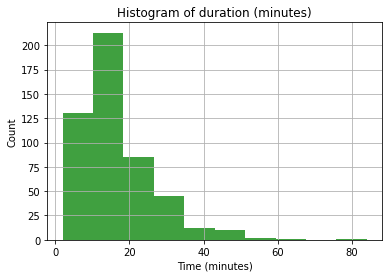

In [82]:
digex_df['duration_min'] = pd.to_timedelta(
    digex_df['duration_sec'], 's').round('T')

digex_df['duration_min'].astype('timedelta64[m]').plot.hist(facecolor='g', alpha=0.75)

plt.xlabel('Time (minutes)')
plt.ylabel('Count')
plt.title('Histogram of duration (minutes)')
plt.grid(True)
plt.show()

### Demographics

Copy table but make pretty in: https://journals.sagepub.com/doi/pdf/10.1177/20563051211033824

## Create script

In [16]:
# %%writefile digex_src/get_summary_statistics.py

import datetime


PARTICIPANT_COUNT = config.PARTICIPANT_COUNT
DECIMAL_PLACES = config.DECIMAL_PLACES


def completed_participants(df, col='finished'):
    return df.loc[df[col] == True][col].sum()


def response_rate(df, 
                  col='finished', 
                  as_percentage=True, 
                  total=config.PARTICIPANT_COUNT,
):
    if as_percentage:
        i = (df.loc[df[col] == True][col].sum() / total) * 100
        return i
    else:
        r = df.loc[df[col] == True][col].sum()
        return f'{r} per {total}'
    
    
def completion_time(df, col='duration_sec', time_unit='sec'):
    if time_unit == 'sec':
        return df[col].describe()
    elif time_unit == 'min':
        return pd.to_timedelta(df[col], 's').describe()